# Quantification with pyGecko

In this example we identify an analyte by its molecular ion in the GC-MS chromatogram and quantify it using a GC-Polyarc-FID measurement.

In [1]:
from pygecko.parsers import MS_Base_Parser, FID_Base_Parser

First we load the GC-MS and GC-FID injections and pick peaks.

In [2]:
ms_injection = MS_Base_Parser.load_injection('FKB-FA-060-A1.mzML')
fid_injection = FID_Base_Parser.load_injection('FKB-FA-060-A1.xy', solvent_delay=2.7)

ms_injection.pick_peaks()
fid_injection.pick_peaks()

We can have a look at the injection's chromatograms using pyGecko's plotting functions.

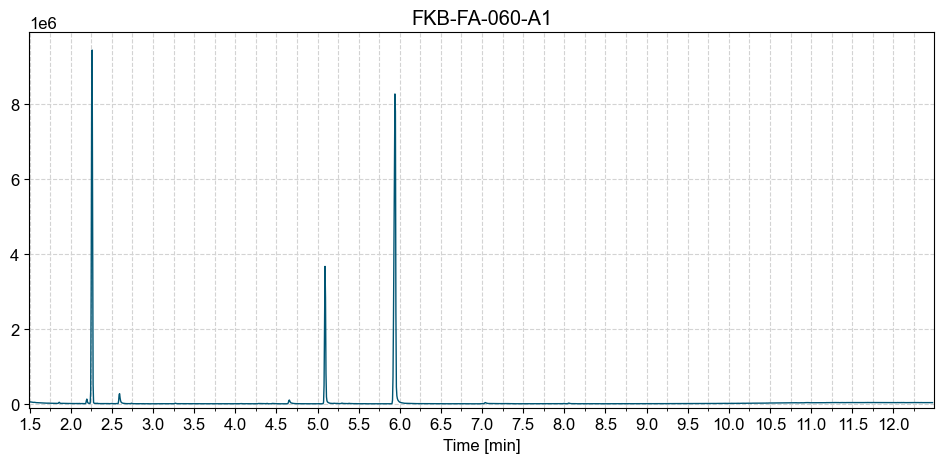

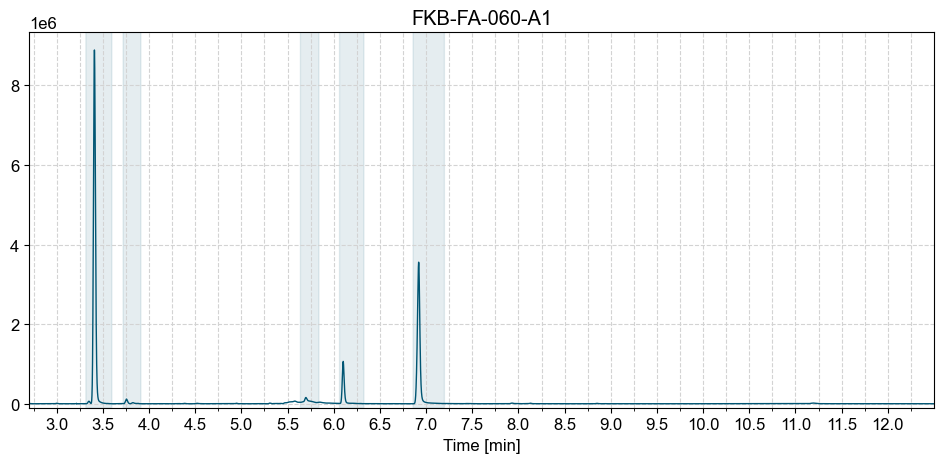

In [3]:
ms_injection.view_chromatogram()
fid_injection.view_chromatogram()

To enable downstream quantification we need to set the internal standard for the GC-FID measurement. The internal standard is used to calculate the obtained reaction yield. 

In [4]:
fid_injection.set_internal_standard(3.407, name='Dodecane', smiles='CCCCCCCCCCCC')

Next we load the RI calibrations for the GC-MS and GC-FID measurements. RI calibrations are used to calculate RI values for each peak. RI values are used to match peaks between the GC-MS and GC-FID measurements.

In [5]:
ms_ri_cal = MS_Base_Parser.load_ri_calibration('FKB-FA-060-RI.mzML', 12, rt=2.255)
fid_ri_cal = FID_Base_Parser.load_ri_calibration('FKB-FA-060-RI.xy', 2.4, 12, rt=3.394)

Then we calculate the RI values for each peak in the GC-MS and GC-FID measurements.

In [6]:
ms_ri_cal.assign_ris(ms_injection)
fid_ri_cal.assign_ris(fid_injection, alignment=True)

We find the peak in the GC-MS measurement that corresponds to the analyte of interest. A matching peak is identified by the m/z value of the molecular ion and the expected isotopic pattern. We can then view the peak's mass spectrum.

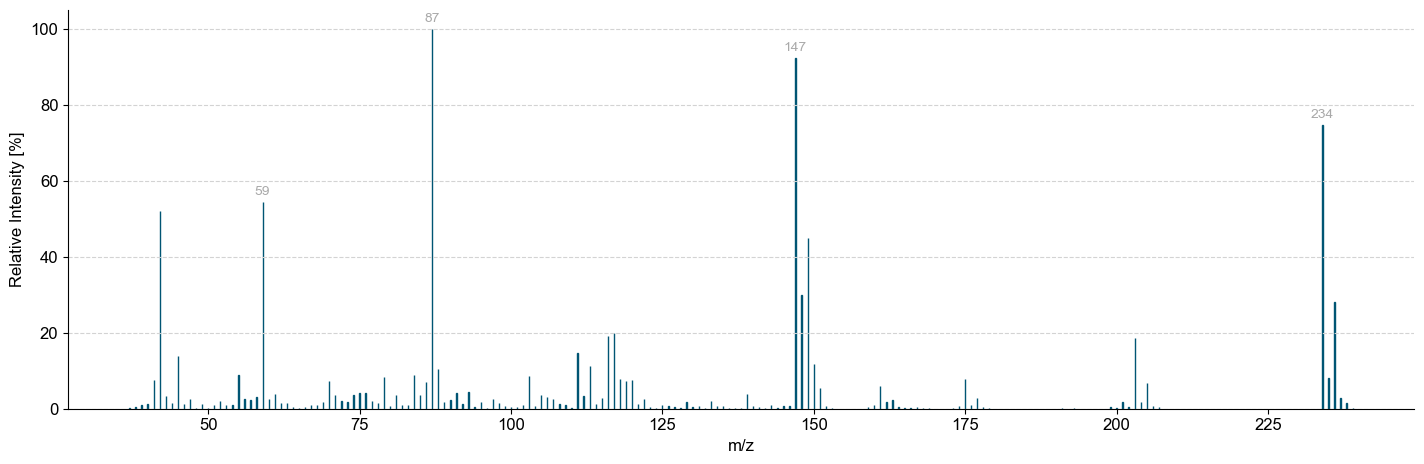

In [7]:
peak_ms = ms_injection.match_mol('CN1C(SCCC(OC)=O)=C(Cl)N=C1')
peak_ms.view_mass_spectrum()

Finally, we match the GC-MS and GC-FID peak of the analyte by their RI values and quantify the analyte of interest. The yield is calculated by comparing the peak area of the analyte in the GC-FID measurement to the peak area of the internal standard. Note that we need ro specify the analyte to be assigned to the GC-FID peak. This is necessary to calculate the carbon normalized peak area for quantification with a Polyarc-FID system.

In [8]:
analyte_peak_fid = fid_injection.match_ri(peak_ms.ri, analyte=peak_ms.analyte)
yield_ = fid_injection.quantify(analyte_peak_fid.rt)
print(f'Yield: {yield_}%')

Yield: 75%
